In [1]:
#%matplotlib widget

In [2]:
import os as OS
import sys as SYS                       #- This for self-made modules setting
SYS.path.insert(0, OS.path.join('..','Resources'))  #-

#-- Import Self-Made Modules
import worldcity as WC                  #--Get random cities
import openweather_apicaller as OA      #--Request OpenWeather API

In [3]:
import pandas as PD
import matplotlib.pyplot as PLT
import scipy.stats as ST

## Functions

In [4]:
# --- Function save plot to .png file
# --- must pass the plot "figure"
# --- default file name is "plot.PNG" if no "file name" was passed
def save_plot_to_file(fg,fname='plot'):
    fg.savefig(OS.path.join('Output',f'{fname}.PNG'))

In [5]:
# --- Function get Linear Regression values from DataFrame passed
# --- returns DataFrame contains Linear Regression and Correlation values
def get_lin_reg_df(df):
    x_col = df.columns[0]   #-Get the column's name
    y_col = df.columns[1]
    lin_reg_corr = ST.linregress(x=df[x_col],y=df[y_col])

    return_lin_reg_corr_df = df
    return_lin_reg_corr_df['linear regression values'] = lin_reg_corr.slope * return_lin_reg_corr_df[x_col] + lin_reg_corr.intercept
    return_lin_reg_corr_df['slope'] = lin_reg_corr.slope
    return_lin_reg_corr_df['intercept'] = lin_reg_corr.intercept
    return_lin_reg_corr_df['rvalue'] = lin_reg_corr.rvalue
    return_lin_reg_corr_df['pvalue'] = lin_reg_corr.pvalue
    return_lin_reg_corr_df['stderr'] = lin_reg_corr.stderr
    
    return return_lin_reg_corr_df


In [6]:
# --- Function to perform drawing scatter plot and Linear Regression line
# --- arguments 'y' = axis y (Temperature, Humidity ...) (versus axis x which is always Latitude)
# --- 'title' either 'Northern Hemisphere' or 'Southern Hemisphere'
# --- 'ax' either 'axis1' or 'axis2' on the figure for plot drawing
def built_plot_scatter_linreg(y,title,ax,color):
    
    if y == temp:
        extender = ' (F)'
    elif y == wind:
        extender = ''
    else:
        extender = ' (%)'
    compare_to = f'{title} - {y}{extender} vs. {vs_latitude}'    
    temp_df = output_dict[compare_to]

    label = f"y = {round(temp_df.iloc[1]['slope'],2)}x + {round(temp_df.iloc[1]['intercept'],2)}"
    label2 = f"Correlation Coefficient : {round(temp_df.iloc[0]['rvalue'],2)}"

    temp_df.plot(kind='scatter', ax=ax, x=x, y=y, title=title, color=color)
    temp_df.plot(kind='line', ax=ax, x=x, y='linear regression values', label=label, color='r').legend(title=label2)

    ax.figure.suptitle(compare_to, y=1)

In [7]:
# --- Function to set up figure for plot axes
# --- creates 1 figure for 2 axes (northen and southern) in the same figure
# --- then call function "built_plot_scatter_linreg" for ploting
def show_plot_scatter_linreg(y,color='C0'):

    fg = PLT.figure(figsize=(10, 4))
    ax1 = fg.add_subplot(121)
    ax2 = fg.add_subplot(122)

    title = south_hem
    built_plot_scatter_linreg(y,title,ax1,color)

    title = north_hem
    built_plot_scatter_linreg(y,title,ax2,color)
    
    title=f'{y} vs. {x}'
    fg.suptitle(title, fontsize=15, color=color, y=1)
    fg.tight_layout()
    save_plot_to_file(fg,f'{title}_SN')

## Random Sample Cities DataFrame

In [8]:

sample_city_df = WC.random_cities_lat()     #- Call Self-Made module, Random Cities DataFrams returned

print(sample_city_df.info())
sample_city_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 7240 to 547
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    611 non-null    object 
 1   City       611 non-null    object 
 2   Latitude   611 non-null    float64
 3   Longitude  611 non-null    float64
dtypes: float64(2), object(2)
memory usage: 23.9+ KB
None


,Country,City,Latitude,Longitude
7240,co,restrepo,3.822034,-76.522423
6798,co,cumbitara,1.651744,-77.582248
14738,gy,lethem,3.383333,-59.800000
6736,co,chipaque,4.442500,-74.044167
6823,co,el castillo,3.563629,-73.794885
24977,my,beranang,2.873300,101.869700
25083,my,tampin,2.470100,102.230200
5200,cd,watsa,3.050000,29.533333
41998,ug,mubende,0.589167,31.360000
39854,so,afmadu,0.517222,42.071111


## Request Weather Data From OpenWeatherMap.org

In [9]:

temp_df = OA.get_weather(sample_city_df)    #- Call self-made module to perform API request, weather details DataFrame returned


Requesting Weather Data From the Source.
1. Restrepo, CO weather data received.✔
2. Cumbitara, CO weather data received.✔
3. Lethem, GY weather data received.✔
4. Chipaque, CO weather data received.✔
5. El castillo, CO weather data received.✔
6. Beranang, MY weather data received.✔
7. Tampin, MY weather data received.✔
8. Watsa, CD weather data received.✔
9. Mubende, UG weather data received.✔
10. Afmadu, SO weather data received.✔
11. Bonaberi, CM weather data received.✔
12. Cocobeach, GA weather data received.✔
13. Sapuyes, CO weather data received.✔
14. Ansermanuevo, CO weather data received.✔
15. Guacari, CO weather data received.✔
16. Sotara, CO weather data received.✔
17. Yabassi, CM weather data received.✔
18. Thinadhoo, MV weather data received.✔
19. Otavalo, EC weather data received.✔
20. Moyale, ET weather data received.✔
21. Almaguer, CO weather data received.✔
22. Suaza, CO weather data received.✔
23. Argelia, CO weather data received.✔
24. San luis, CO weather data receive

## Sample Cities + Weather Details DataFrame

In [10]:
sample_city_df = sample_city_df.merge(temp_df, left_index=True, right_on='index_x')

sample_city_df.to_csv(OS.path.join('Output','sample_city_weather.csv'), index=False)

print(sample_city_df.info())
sample_city_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           611 non-null    object 
 1   City              611 non-null    object 
 2   Latitude          611 non-null    float64
 3   Longitude         611 non-null    float64
 4   index_x           611 non-null    float64
 5   Temperature       611 non-null    float64
 6   Humidity          611 non-null    float64
 7   Cloudiness        611 non-null    float64
 8   Wind Speed (mph)  611 non-null    float64
dtypes: float64(7), object(2)
memory usage: 47.7+ KB
None


,Country,City,Latitude,Longitude,index_x,Temperature,Humidity,Cloudiness,Wind Speed (mph)
0,co,restrepo,3.822034,-76.522423,7240.0,69.80,83.0,40.0,282.0
1,co,cumbitara,1.651744,-77.582248,6798.0,57.87,100.0,93.0,153.0
2,gy,lethem,3.383333,-59.800000,14738.0,74.62,84.0,51.0,245.4
3,co,chipaque,4.442500,-74.044167,6736.0,51.80,93.0,40.0,81.6
4,co,el castillo,3.563629,-73.794885,6823.0,69.06,69.0,62.0,147.6
5,my,beranang,2.873300,101.869700,24977.0,89.29,66.0,40.0,282.0
6,my,tampin,2.470100,102.230200,25083.0,88.00,66.0,20.0,282.0
7,cd,watsa,3.050000,29.533333,5200.0,65.59,100.0,99.0,119.4
8,ug,mubende,0.589167,31.360000,41998.0,64.31,57.0,83.0,158.4
9,so,afmadu,0.517222,42.071111,39854.0,78.39,71.0,94.0,838.8


# Scatter Plots

## Cities Temperature VS Latitude

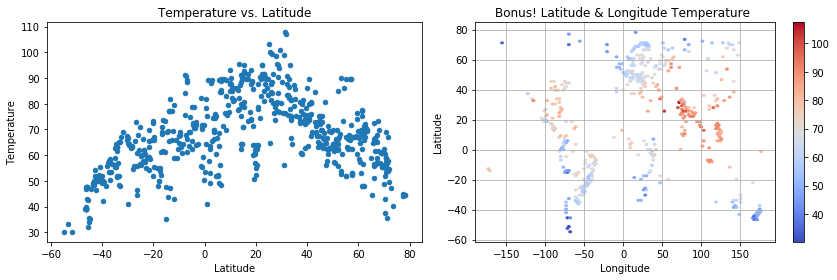

In [11]:

fg = PLT.figure(figsize=(12, 4))        #- setup figure for 2 axes (the extra axe for bonus plot)
ax1 = fg.add_subplot(121)
ax2 = fg.add_subplot(122)
title = 'Temperature vs. Latitude'
sample_city_df.plot(kind='scatter', x='Latitude', y='Temperature', ax=ax1, title=title)
sample_city_df.plot(kind='hexbin',x='Longitude',y='Latitude',C='Temperature',grid=True,ax=ax2, cmap='coolwarm', title='Bonus! Latitude & Longitude Temperature ')

fg.tight_layout()
save_plot_to_file(fg, title)            #- call function to save plot to file

- The weather temperature appeared to be hotter toward 20-40 degree Latitude band not the Equator as first belief
- Southern Hemisphere cities have lower temperature when compare to the same degree Latitude in the Northern Hemisphere cities


## Cities Humidity VS Latitude

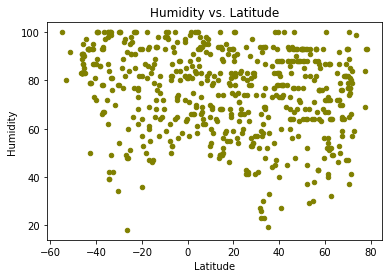

In [12]:
title = 'Humidity vs. Latitude'
ax = sample_city_df.plot(kind='scatter', x='Latitude', y='Humidity', title=title, color='olive');
save_plot_to_file(ax.get_figure(), title)       #- call function to save plot to file

- In this sample data most cities have more than 60% humidity regardless of either side of the Equator the cities located

## Cities Cloudiness VS Latitude

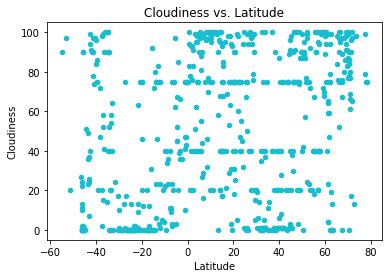

In [13]:
title='Cloudiness vs. Latitude'
ax = sample_city_df.plot(kind='scatter', x='Latitude', y='Cloudiness', title=title, color='tab:cyan');
save_plot_to_file(ax.get_figure(), title)       #- call function to save plot to file

- Clear skies and thick cloud cities are spread all over the degree latitude Southern and Northerb Hemisphere.

## Cities Wind Speed (mph) VS Latitude

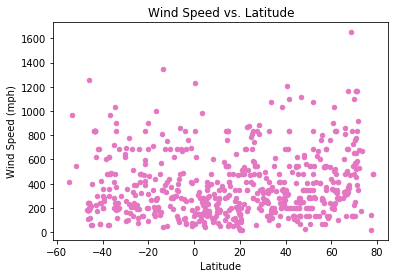

In [14]:
title='Wind Speed vs. Latitude'
sample_city_df.plot(kind='scatter', x='Latitude', y='Wind Speed (mph)', title=title, color='tab:pink');
save_plot_to_file(ax.get_figure(), title)       #- call function to save plot to file

- Degree of heaviness of wind speed is not associated with degree latitude a city located

In [15]:
# --- This cell create Dictionary to store (Linear Regression and Correlation values) DataFrame
# --- for iteration used for all plots 


output_dict = {}    #- this Dict's values will store (Linear Regression and Correlation values) DataFrame

x=vs_latitude = 'Latitude'
north_hem = 'Northern Hemisphere'
south_hem = 'Southern Hemisphere'
temp = 'Temperature'
humid = 'Humidity'
cloud = 'Cloudiness'
wind = 'Wind Speed (mph)'

# --- Create Dict for all Nothern and Southern Hem. for plots looping purpose
# --- compare_dict = {'Northern Hemisphere - Temperature (F)':'Temperature', 'Southern Hemisphere - Temperature (F)':'Temperature', ...}
compare_dict = {f'{north_hem} - {temp} (F)':temp, f'{south_hem} - {temp} (F)':temp \
               , f'{north_hem} - {humid} (%)':humid, f'{south_hem} - {humid} (%)':humid \
               , f'{north_hem} - {cloud} (%)':cloud, f'{south_hem} - {cloud} (%)':cloud \
               , f'{north_hem} - {wind}':wind, f'{south_hem} - {wind}':wind}

for zkey, zvalue in compare_dict.items():
    if zkey.find(north_hem) != -1:
        lin_reg_values = sample_city_df[sample_city_df[vs_latitude] > 0][[vs_latitude,zvalue]]
        #- = 2 columns DataFrame of Northern "Latitude" and either 'Temperature', 'Humidity', 'Cloudiness' or 'Wind Speed (mph)'
    else:
        lin_reg_values = sample_city_df[sample_city_df[vs_latitude] < 0][[vs_latitude,zvalue]]
        #- = 2 columns DataFrame of Southern
    
    output_dict[f'{zkey} vs. {vs_latitude}'] = get_lin_reg_df(lin_reg_values)
    #- call function to get Linear regression
    #- the value of a output_dict key is (Linear Regression and Correlation values) DataFrame returned from the function


## Southen and Nothern Hemisphere Temperature VS Latitude

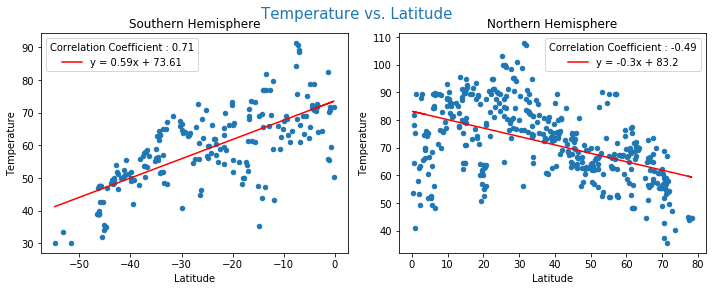

In [16]:
show_plot_scatter_linreg(temp)                  #- call function to create and save plot to file

- The correlation coefficiant between the Southern Hemisphere cities and the degree latitude are quite strong compare to the Northern Hemisphere cities weather which is weak
- So if you live in the Southen Hemisphere, furthur north you move to, it likely that the weather temperature will get higher

## Southen and Nothern Hemisphere Humidity VS Latitude

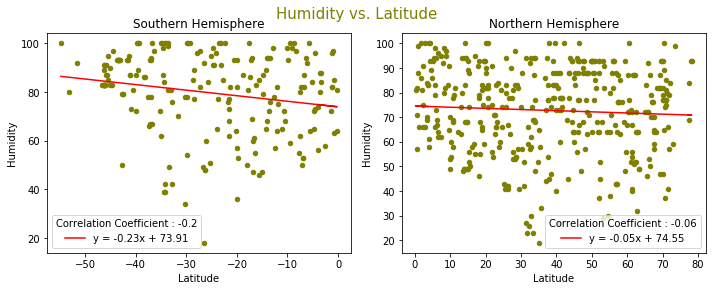

In [17]:
show_plot_scatter_linreg(humid,'olive')         #- call function to create and save plot to file

- The cities humidity correlation coefficient vary weak for both Southern and Northern Hemisphere to the degree latitude.

## Southen and Nothern Hemisphere Cloudiness VS Latitude

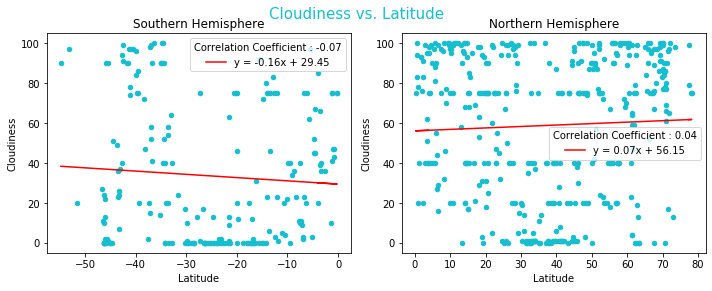

In [18]:
show_plot_scatter_linreg(cloud,'tab:cyan')      #- call function to create and save plot to file

- Cloudiness of a city unlikely to have anything to do with the degree latitude.

## Southen and Nothern Hemisphere Wind Speed (mph) VS Latitude

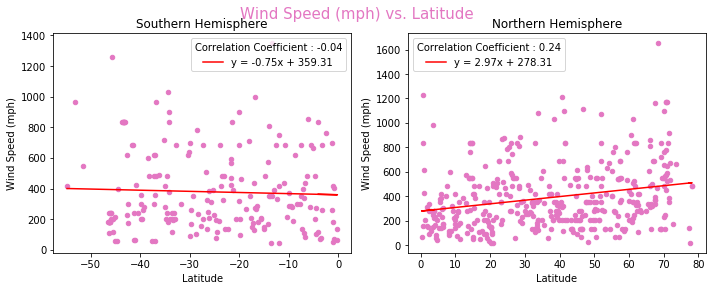

In [19]:
show_plot_scatter_linreg(wind,'tab:pink')       #- call function to create and save plot to file

- Wind speed in a city do not depend on any degree of latitude.